##**Resolución ecuaciones matriciales**

Para resolver una sistema de ecuaciones se debe hallar la matriz Ampliada se A ∈ Mmxn, x ∈ Mnx1 y b ∈ Mmx1. La matriz ampliada asociada al sistema de ecuaciones es: A * x = b, viene dada por (A|b) la matriz ampliada esta dad por A y el conjunto de soluciones. Para poder resolver esto debemos ver un par de conceptos previos 

###**Matriz escalonada reducidad por filas**

Es una matriz en la que el primer el primer elemento de la matriz debe ser uno y el resto de elemenos de la columna de abajo deben ser cero, despues se pasa al elemento de abajo a la derecha y se hace lo mismo, para realizar este proceso utilizamos las operaciones por fila. 
A continuación ejemplos de como hacerlo 

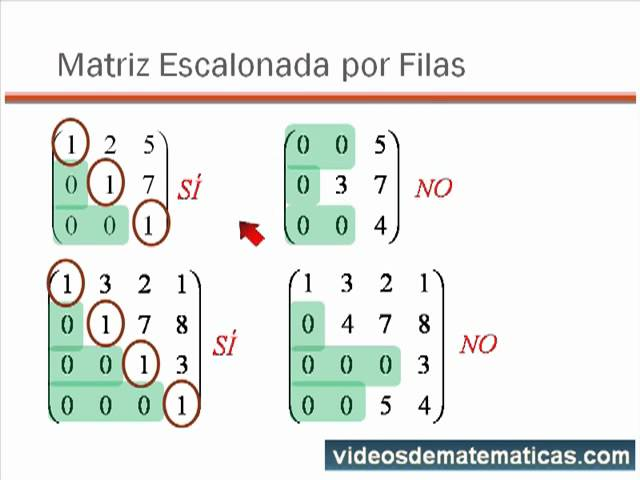


In [ ]:
# Ejemplos de matriz reducida escalonada 
import numpy as np
from sympy import Matrix

# Definir la matriz de coeficientes
A = Matrix([[2, 1, -1, 2],
            [1, 3, 2, -1],
            [4, 2, 0, 1]])

# Obtener la RREF de la matriz A
rref, pivot_cols = A.rref()

# Imprimir la matriz RREF
print("Forma escalonada reducida (RREF):")
print(rref)
# Definir la matriz de coeficientes
B = Matrix([[1, 1, 2],
            [0, 3, -1],
            [-2, 4, 0]])

# Obtener la RREF de la matriz A
rref, pivot_cols = B.rref()

# Imprimir la matriz RREF
print("Forma escalonada reducida (RREF):")
print(rref)


Forma escalonada reducida (RREF):
Matrix([[1, 0, 0, -1/10], [0, 1, 0, 7/10], [0, 0, 1, -3/2]])
Forma escalonada reducida (RREF):
Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])


###**Solución de un sistema de ecuaciones**

Siendo la representación matricial del Ax= b de un sistema de ecuaciones lineales, se dice que la solución es todo Z, tal que A*z = b

**Teorema para la solución de un se**
Sea A y C ∈ Mmxn, x ∈ Mnx1; b y d ∈ Mmx1. Dos sistemas de ecuaciones represe3ntado por Ax=b y Cx=d, los sistemas tiene la misma solucion si y solo si 

(A|b) ∼ (C|d), es decir las matrices aumentadas son equivalentes por filas.

Ejemplos

In [ ]:
#Ejercicio dado el sistema de ecuaciones: 1. 3x+y=-6 , 2. x-2y=-5
import numpy as np

# Definir la matriz de coeficientes
A = np.array([[3, 1],
              [1, -2]])

# Definir el vector de términos independientes
b = np.array([6, -5])

# Resolver el sistema de ecuaciones
X = np.linalg.solve(A, b)

# Imprimir las soluciones
print("Soluciones:")
print("x =", X[0])
print("y =", X[1])

Soluciones:
x = 1.0
y = 3.0


##**Métodos para resolver el sistema de ecuaciones lineales:**

**Método de reducción Gauss-Jordan**

Los pasos son:
1. Formar (A|b)
2. Hacer las operaciones escalonada reducida por filas en (A|b)
3. Despejar las filas para ver a que son igual las variables.

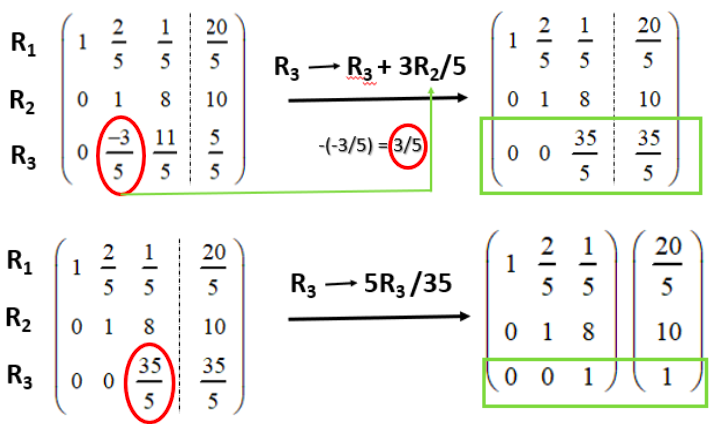

**Método de eliminación de Gauss**

1. Formar (A|b)
2. Escalonar por filas a (A|b)
3. Ver los valores de las incognitas

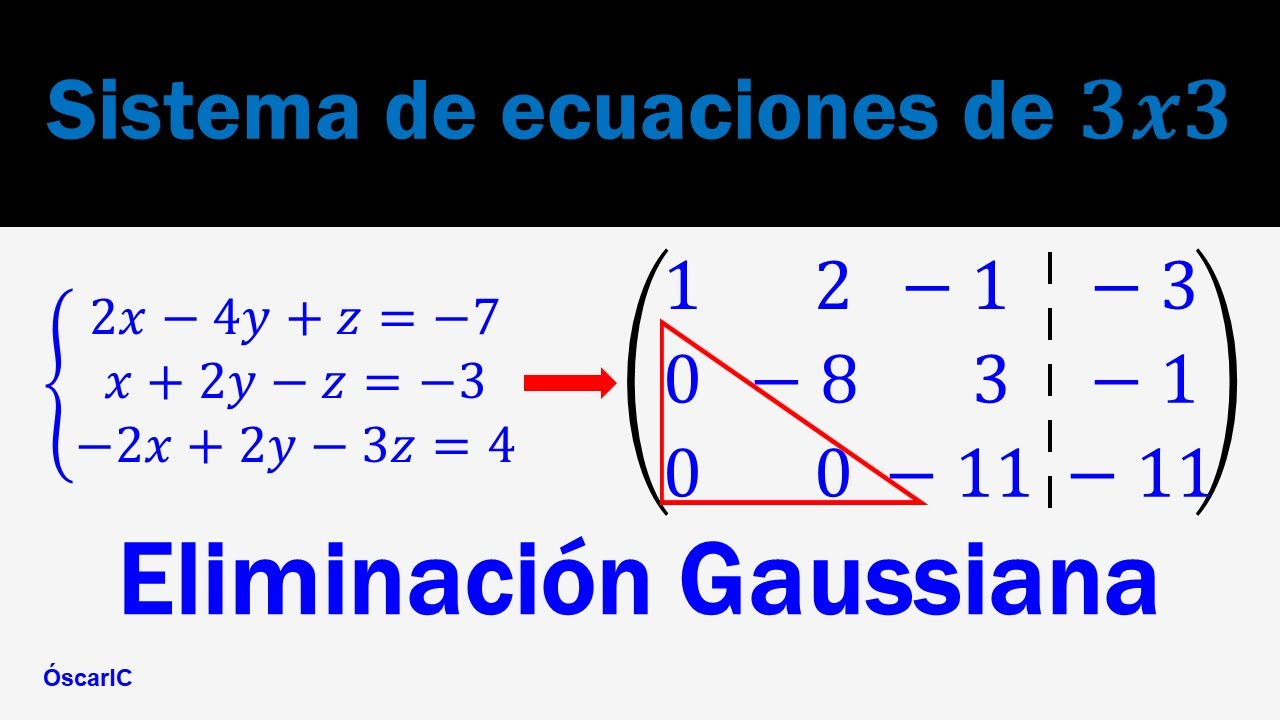

**Metodo de la matriz inversa**

El método de resolución de sistemas de ecuaciones utilizando la matriz inversa se basa en la siguiente premisa: si tenemos un sistema de ecuaciones lineales de la forma AX = B, donde A es una matriz de coeficientes, X es un vector de incógnitas y B es un vector de constantes, entonces la solución se puede encontrar multiplicando ambos lados de la ecuación por la matriz inversa de A.

El proceso de resolución utilizando la matriz inversa se puede dividir en los siguientes pasos:

Dado el sistema de ecuaciones AX = B, se obtiene la matriz de coeficientes A y el vector de constantes B.

Se calcula la matriz inversa de A utilizando el método adecuado, como el método de Gauss-Jordan o la descomposición LU.

Se multiplica la matriz inversa de A por el vector de constantes B, es decir, X = A^(-1) * B.

Se obtiene el vector de incógnitas X, que representa la solución del sistema de ecuaciones.

Es importante tener en cuenta que para aplicar este método, la matriz de coeficientes A debe ser cuadrada y no singular, es decir, debe tener una inversa. Si la matriz A no es cuadrada o es singular, entonces el sistema de ecuaciones puede no tener solución única o no tener solución en absoluto.

In [3]:
#Ejemplo con el metodo de reduccion Gauss-Jordan
import numpy as np

# Definir el sistema de ecuaciones en forma matricial: A * X = B
A = np.array([[2, 1, -1],
              [1, -3, 2],
              [3, -2, 5]])

B = np.array([[-2],
              [1],
              [3]])

# Concatenar la matriz A con el vector B para formar una matriz aumentada [A|B]
AB = np.hstack((A, B))
print("La matriz ampliada es:")
print(AB)

# Aplicar la eliminación de Gauss-Jordan
n = len(AB)

for i in range(n):
    # Pivoteo parcial
    max_index = np.argmax(np.abs(AB[i:, i])) + i
    AB[[i, max_index]] = AB[[max_index, i]]

    # Normalización del pivote
    AB[i] = AB[i] / AB[i, i]

    # Eliminación hacia adelante
    for j in range(i + 1, n):
        AB[j] = AB[j] - AB[i] * AB[j, i]

    # Eliminación hacia atrás
    for j in range(i):
        AB[j] = AB[j] - AB[i] * AB[j, i]

# Extraer la matriz de coeficientes escalonada
RREF = AB[:, :-1]

# Extraer el vector de términos independientes reducido
B_reduced = AB[:, -1]

# Imprimir la solución del sistema de ecuaciones
print("Solución:")

La matriz ampliada es:
[[ 2  1 -1 -2]
 [ 1 -3  2  1]
 [ 3 -2  5  3]]
Solución:


In [4]:
#Metodo de eliminacion de Gauss
import numpy as np

# Definir el sistema de ecuaciones en forma matricial: A * X = B
A = np.array([[2, 1, -1],
              [1, -3, 2],
              [3, -2, 5]])

B = np.array([[-2],
              [1],
              [3]])

# Concatenar la matriz A con el vector B para formar una matriz aumentada [A|B]
AB = np.hstack((A, B))
print("La matriz ampliada es:")
print(AB)

# Aplicar la eliminación de Gauss
n = len(AB)

for i in range(n-1):
    for j in range(i+1, n):
        factor = AB[j, i] / AB[i, i]
        AB[j] = AB[j] - factor * AB[i]

# Resolver el sistema de ecuaciones mediante sustitución hacia atrás
X = np.zeros((n, 1))

for i in range(n-1, -1, -1):
    X[i] = AB[i, -1] / AB[i, i]
    for j in range(i-1, -1, -1):
        AB[j, -1] = AB[j, -1] - AB[j, i] * X[i]

# Imprimir la solución del sistema de ecuaciones
print("Solución:")
print(X)

La matriz ampliada es:
[[ 2  1 -1 -2]
 [ 1 -3  2  1]
 [ 3 -2  5  3]]
Solución:
[[-0.5]
 [-0. ]
 [ 1. ]]


##**Teorema de Rouché-Frobenius**

Sea A ∈ Mmxn, b ∈ Mmx1 dado el sistema Ax=b, se tiene que 
-El sistema es consitente, es decir tiene solución ya sea esta única o infinitas soluciones, si y solo si rang(A) = rang(B)
-En caso de que el sistema sea consistente, la solución es única si y solo si rang(A) = n.

##**Regla de Cramer**

La Regla de Cramer es un método utilizado para resolver sistemas de ecuaciones lineales (SEL) en los que el número de ecuaciones es igual al número de incógnitas. Esta regla se basa en la teoría de determinantes y establece que si el determinante de la matriz de coeficientes del sistema no es igual a cero, entonces el sistema tiene una única solución.
El método de la Regla de Cramer implica calcular determinantes para determinar los valores de las incógnitas. Se sigue el siguiente procedimiento:

Se calcula el determinante principal de la matriz de coeficientes A, que se denota como |A|.
Para encontrar el valor de la i-ésima incógnita, se reemplaza la columna i de A con el vector de constantes B y se calcula el determinante de la matriz resultante, que se denota como |A_i|.
El valor de la i-ésima incógnita se obtiene dividiendo |A_i| entre |A|.

##**Descomposición LU**

Descomposiciones LU y su aplicación a los sistemas de ecuaciones lineales y a la inversión de matrices:
Las descomposiciones LU son métodos utilizados para factorizar una matriz cuadrada en el producto de dos matrices, L y U, donde L es una matriz triangular inferior y U es una matriz triangular superior. Estas descomposiciones tienen aplicaciones importantes en la resolución de sistemas de ecuaciones lineales y en la inversión de matrices.
La descomposición LU se utiliza para resolver sistemas de ecuaciones lineales de manera más eficiente y estable. En lugar de aplicar directamente la eliminación de Gauss al sistema original, se factoriza la matriz de coeficientes en L y U. Luego, se resuelven dos sistemas de ecuaciones triangulares, uno con L y otro con U, para encontrar las soluciones del sistema original.

En cuanto a la inversión de matrices, la descomposición LU también se aplica para calcular la inversa de una matriz. Una vez que se ha descompuesto la matriz en L y U, se puede utilizar la descomposición para invertir cada una de las matrices triangulares, obteniendo así la inversa de la matriz original.

La descomposición LU es útil cuando se necesita resolver varios sistemas de ecuaciones con la misma matriz de coeficientes o cuando se requiere calcular la inversa de una matriz varias veces, ya que se evita el costo computacional de repetir el proceso de eliminación de Gauss en cada caso.

In [7]:
import numpy as np
#Metodo de Cramer
# Sistema de ecuaciones
A = np.array([[2, 1, -1], [1, -3, 2], [3, 2, -4]])
B = np.array([5, -1, 3])

# Calculamos el determinante principal de la matriz de coeficientes A
det_A = np.linalg.det(A)

# Calculamos los determinantes para encontrar los valores de las incógnitas
x = np.linalg.det(np.column_stack((B, A[:, 1:]))) / det_A
y = np.linalg.det(np.column_stack((A[:, 0], B, A[:, 2:]))) / det_A
z = np.linalg.det(np.column_stack((A[:, :-1], B))) / det_A

# Imprimimos las soluciones
print("Solución utilizando el método de Cramer:")
print("x =", x)
print("y =", y)
print("z =", z)


#Descomposicion LU

import scipy

# Sistema de ecuaciones
A = np.array([[2, 1, -1], [1, -3, 2], [3, 2, -4]])
B = np.array([5, -1, 3])

# Descomposición LU
P, L, U = scipy.linalg.lu(A)

# Resolvemos el sistema de ecuaciones Ly = PB
y = np.linalg.solve(L, np.dot(P, B))

# Resolvemos el sistema de ecuaciones Ux = y
x = np.linalg.solve(U, y)

# Imprimimos las soluciones
print("Solución utilizando la descomposición LU:")
print("x =", x[0])
print("y =", x[1])
print("z =", x[2])


Solución utilizando el método de Cramer:
x = 2.333333333333333
y = 2.6666666666666674
z = 2.333333333333334
Solución utilizando la descomposición LU:
x = 2.333333333333334
y = 2.666666666666667
z = 2.333333333333334
